In [2]:
import django, os, sys, time, resource, re, gc, shutil
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from django.db.models import Count, Avg

sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')

os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.models import *
qid = 1457

In [3]:
bgs = Bigram.objects.filter(docbigram__doc__query=qid).values('stem2','pos').annotate(
    n = models.Count('docbigram__pk')
).order_by('-n')


In [4]:
df = pd.DataFrame.from_dict(list(bgs))
allwords = df
df.head()

,n,pos,stem2
0,23021,1,develop
1,5706,1,agricultur
2,5607,-1,environment
3,4992,1,manag
4,3828,-1,toward


-1
       n  pos        stem2
2   5607   -1  environment
4   3828   -1       toward
6   3343   -1      develop
8   3281   -1       achiev
10  2748   -1         term
11  2378   -1       promot
13  2077   -1           un
14  1972   -1        ensur
15  1775   -1       econom
19  1556   -1       ecolog
20  1515   -1       assess
22  1472   -1       effect
23  1455   -1       improv
24  1354   -1      concept
27  1240   -1    implement
30  1152   -1      support
32  1127   -1          use
38  1049   -1        manag
39  1040   -1    contribut
41  1032   -1      maximum
44   981   -1       effici
45   969   -1       provid
48   937   -1      product
49   924   -1        evalu
50   912   -1   agricultur
53   871   -1     approach
56   833   -1       social
58   825   -1     strategi
59   817   -1      conserv
60   814   -1       system
62   812   -1        urban
63   793   -1       integr
67   780   -1        creat
69   775   -1       enhanc
70   766   -1        indic
72   757   -1         edu

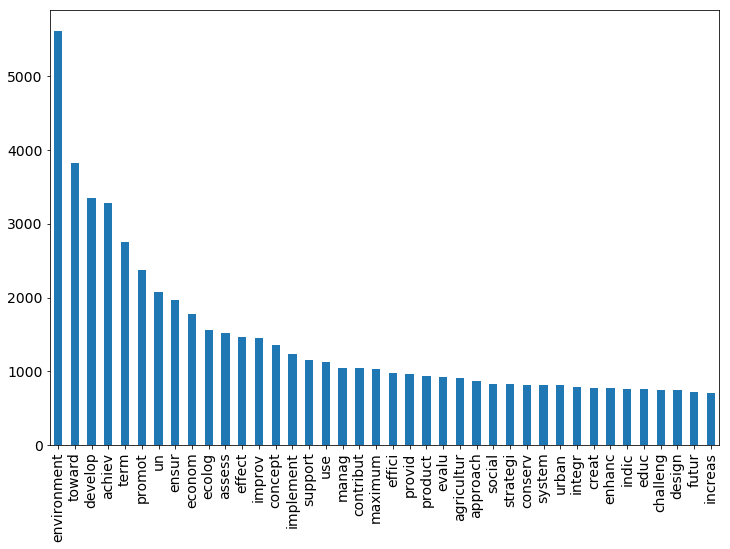

1
        n  pos        stem2
0   23021    1      develop
1    5706    1   agricultur
3    4992    1        manag
5    3617    1       energi
7    3323    1          use
9    3155    1      product
12   2117    1       forest
16   1760    1        urban
17   1699    1        water
18   1617    1       assess
21   1481    1         land
25   1286    1       econom
26   1274    1        futur
28   1212    1        indic
29   1178    1        yield
31   1128    1      tourism
33   1108    1        solut
34   1075    1    transport
35   1075    1    chemistri
36   1063    1      practic
37   1054    1      resourc
40   1033    1          way
42   1027    1       altern
43   1021    1     competit
46    960    1         food
47    955    1       growth
51    894    1     consumpt
52    884    1         issu
54    859    1     approach
55    838    1         crop
57    829    1      fisheri
61    813    1     strategi
64    791    1    communiti
65    786    1      harvest
66    785    1  en

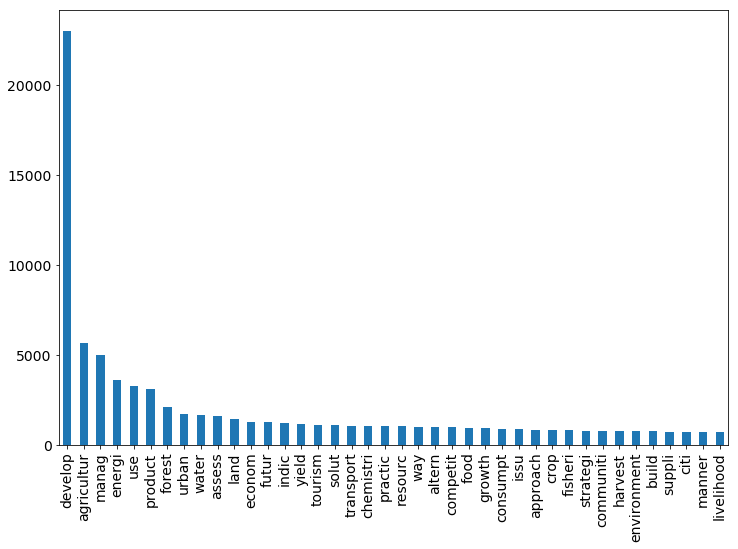

In [5]:
plt.rcParams["figure.figsize"] = [12,8]
for name, group in df.groupby('pos'):
    print(name)
    pdf = group.head(40)
    print(pdf)
    ax = pdf['n'].plot.bar()
    ax.set_xticklabels(pdf.stem2)
    ax.tick_params(labelsize=14)
    plt.show()

In [77]:
bgs = Bigram.objects.filter(docbigram__doc__query=qid).values('stem2','pos','docbigram__doc__PY').annotate(
    n = models.Count('docbigram__pk')
).order_by('-n')
df = pd.DataFrame.from_dict(list(bgs))
df.head()

,docbigram__doc__PY,n,pos,stem2
0,2016,1950,1,develop
1,2015,1692,1,develop
2,2014,1315,1,develop
3,2013,1278,1,develop
4,2012,1157,1,develop


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


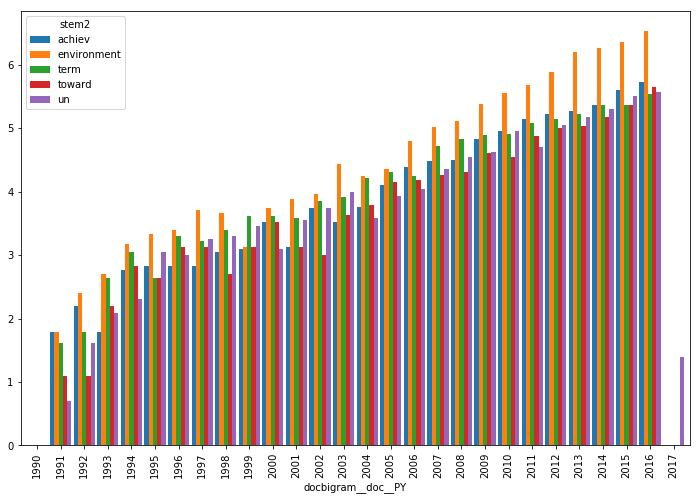

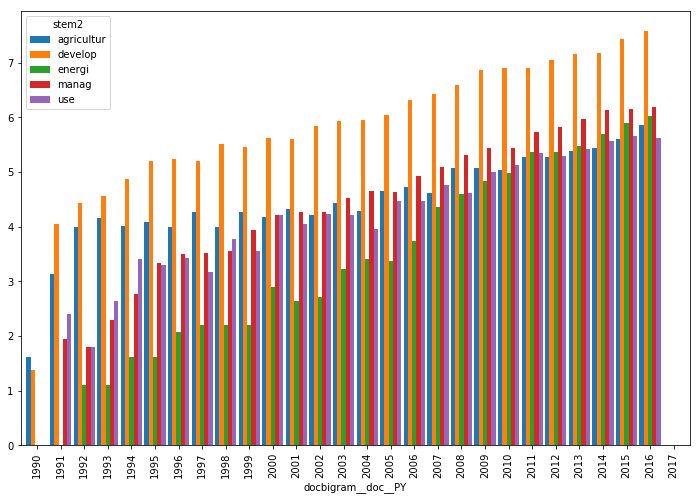

In [85]:
for i in [-1,1]:
    pdf = df[(df['stem2'].isin(list(allwords[allwords['pos']==i].head()['stem2']))) & (df['pos']==i)]
    pdf['n'] = np.log(pdf['n'])
    pdf = pd.pivot_table(data=pdf, 
                            index='docbigram__doc__PY',
                            columns='stem2',
                            values='n'
                        )
    pdf.plot.bar(width=0.9)
    plt.show()

In [65]:
pdf

stem2,agricultur,develop,environment,manag,use
docbigram__doc__PY,2003.000000,2003.500000,2003.88,2003.500000,2003.500000
n,115.814815,562.178571,9.28,159.846154,104.115385
pos,1.000000,1.000000,1.00,1.000000,1.000000


In [7]:
suswhats =  Bigram.objects.filter(docbigram__doc__query=qid,pos=1).values('stem2','pos','docbigram__doc__PY').annotate(
    n = models.Count('docbigram__pk')
).order_by('-n')

suswhats

<QuerySet [{'n': 2693, 'docbigram__doc__PY': 2016, 'stem2': 'develop', 'pos': 1}, {'n': 2321, 'docbigram__doc__PY': 2015, 'stem2': 'develop', 'pos': 1}, {'n': 1923, 'docbigram__doc__PY': 2014, 'stem2': 'develop', 'pos': 1}, {'n': 1851, 'docbigram__doc__PY': 2013, 'stem2': 'develop', 'pos': 1}, {'n': 1655, 'docbigram__doc__PY': 2012, 'stem2': 'develop', 'pos': 1}, {'n': 1490, 'docbigram__doc__PY': 2011, 'stem2': 'develop', 'pos': 1}, {'n': 1434, 'docbigram__doc__PY': 2010, 'stem2': 'develop', 'pos': 1}, {'n': 1359, 'docbigram__doc__PY': 2009, 'stem2': 'develop', 'pos': 1}, {'n': 1036, 'docbigram__doc__PY': 2008, 'stem2': 'develop', 'pos': 1}, {'n': 916, 'docbigram__doc__PY': 2007, 'stem2': 'develop', 'pos': 1}, {'n': 775, 'docbigram__doc__PY': 2006, 'stem2': 'develop', 'pos': 1}, {'n': 640, 'docbigram__doc__PY': 2016, 'stem2': 'energi', 'pos': 1}, {'n': 628, 'docbigram__doc__PY': 2005, 'stem2': 'develop', 'pos': 1}, {'n': 581, 'docbigram__doc__PY': 2016, 'stem2': 'agricultur', 'pos': 1}

In [14]:
words = set()
for y in range(1990,2018):
    print(y)
    ywords = set(list(suswhats.filter(docbigram__doc__PY=y,n__gt=2).values_list('stem2',flat=True)))
    new_words = ywords.difference(words)
    new_bigrams = suswhats.filter(docbigram__doc__PY=y,stem2__in=new_words).order_by('-n')[:10]
    words = words.union(ywords)
    print(new_bigrams.values('stem2','n'))

1990
<QuerySet [{'stem2': 'develop', 'n': 100700}, {'stem2': 'develop', 'n': 86488}, {'stem2': 'develop', 'n': 71744}, {'stem2': 'develop', 'n': 69160}, {'stem2': 'develop', 'n': 61978}, {'stem2': 'develop', 'n': 55822}, {'stem2': 'develop', 'n': 53542}, {'stem2': 'develop', 'n': 50768}, {'stem2': 'develop', 'n': 38760}, {'stem2': 'develop', 'n': 34238}]>
1991
<QuerySet [{'stem2': 'land', 'n': 572}, {'stem2': 'land', 'n': 544}, {'stem2': 'land', 'n': 500}, {'stem2': 'land', 'n': 428}, {'stem2': 'util', 'n': 420}, {'stem2': 'util', 'n': 396}, {'stem2': 'util', 'n': 372}, {'stem2': 'util', 'n': 348}, {'stem2': 'land', 'n': 336}, {'stem2': 'land', 'n': 328}]>
1992
<QuerySet [{'stem2': 'approach', 'n': 290}, {'stem2': 'approach', 'n': 222}, {'stem2': 'way', 'n': 208}, {'stem2': 'way', 'n': 206}, {'stem2': 'practic', 'n': 205}, {'stem2': 'way', 'n': 204}, {'stem2': 'practic', 'n': 201}, {'stem2': 'practic', 'n': 180}, {'stem2': 'approach', 'n': 173}, {'stem2': 'way', 'n': 156}]>
1993
<Query

In [11]:
words = words.union(ywords)

print(words)

{'fisheri', 'veget', 'ethic', 'increas', 'way', 'modern', 'live', 'system', 'forestri', 'organ', 'watersh', 'primari', 'consid', 'futur', 'smallhold', 'product', 'agroforestri', 'forest', 'may', 'societi', 'non', 'profit', 'manner', 'current', 'requir', 'natur', 'stori', 'attribut', 'poverti', 'high', 'sourc', 'democrat', 'util', 'work', 'urban', 'manufactur', 'health', 'competit', 'issu', 'growth', 'cost', 'basi', 'depend', 'convent', 'farm', 'invest', 'respons', 'communiti', 'swim', 'pastur', 'food', 'mechan', 'improv', 'concept', 'approach', 'resourc', 'must', 'power', 'rural', 'afford', 'manag', 'livestock', 'low', 'protein', 'unsustain', 'soil', 'surfac', 'dryland', 'collus', 'term', 'strategi', 'agricultur', 'inform', 'function', 'develop', 'plant', 'economi', 'environ', 'research', 'project', 'econom', 'concern', 'fire', 'financ', 'paradigm', 'long', 'biolog', 'chang', 'suppli', 'need', 'use', 'consider', 'cultur', 'activ', 'water', 'institut', 'busi', 'famili', 'environment', '